[*********************100%%**********************]  10 of 10 completed


Ticker         AAPL         ADBE         AMZN        GOOGL          HON  \
count   1887.000000  1887.000000  1887.000000  1887.000000  1887.000000   
mean       0.000986     0.000983     0.000933     0.000786     0.000615   
std        0.019123     0.021144     0.020928     0.018114     0.015244   
min       -0.128647    -0.167932    -0.140494    -0.116342    -0.120868   
25%       -0.007669    -0.007474    -0.008549    -0.006938    -0.005833   
50%        0.000765     0.001673     0.001301     0.001088     0.000952   
75%        0.010512     0.011073     0.010940     0.009263     0.007587   
max        0.119808     0.177193     0.135359     0.162584     0.150684   

Ticker         MSFT         NFLX         NVDA         PYPL         TSLA  
count   1887.000000  1887.000000  1887.000000  1887.000000  1887.000000  
mean       0.001117     0.001029     0.002277     0.000651     0.001667  
std        0.017739     0.028850     0.030923     0.024404     0.036531  
min       -0.147390    -0.35

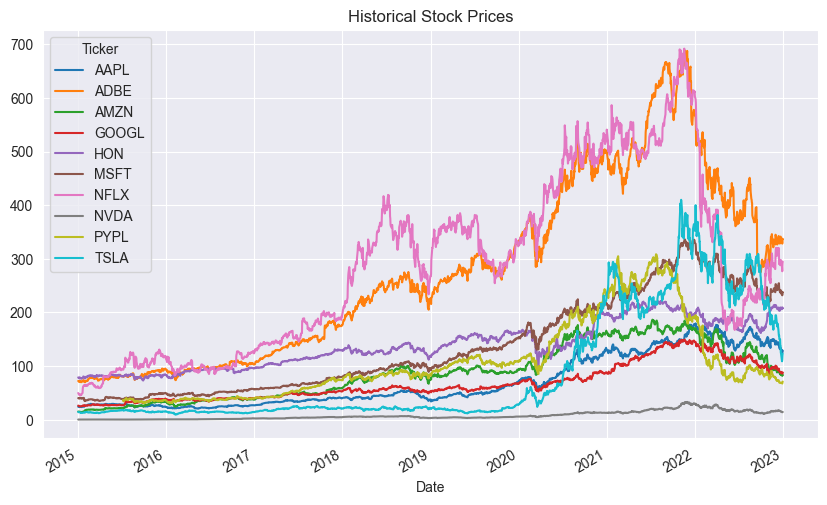

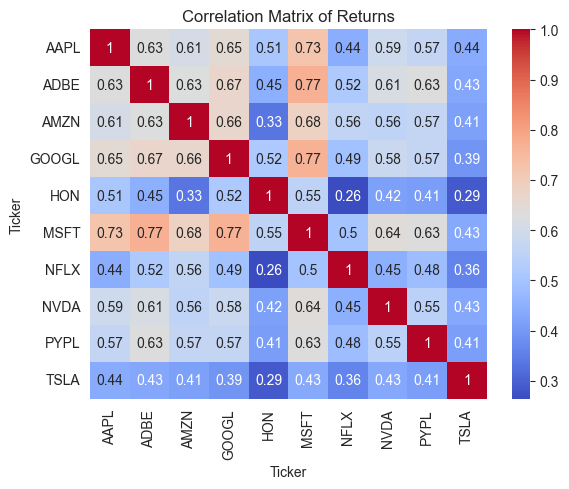

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
import yfinance as yf

# Load historical data for a list of stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'NVDA', 'PYPL', 'ADBE', 'NFLX', 'HON']
data = yf.download(tickers, start="2015-01-01", end="2023-01-01")['Adj Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Summary statistics
print(returns.describe())

# Plot the closing prices
data.plot(figsize=(10, 6))
plt.title('Historical Stock Prices')
plt.show()

# Correlation matrix
sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Returns')
plt.show()


In [7]:
# apply wilcox test
from scipy.stats import wilcoxon
wilcoxon(data['AAPL'], data['HON'])

WilcoxonResult(statistic=0.0, pvalue=0.0)

In [8]:
# apply t-test
from scipy.stats import ttest_ind
ttest_ind(data['AAPL'], data['HON'])


TtestResult(statistic=-46.67044675914555, pvalue=0.0, df=4026.0)

In [9]:
# Spearman correlation
from scipy.stats import spearmanr
spearmanr(data['AAPL'], data['HON'])


SignificanceResult(statistic=0.9305534316572615, pvalue=0.0)

In [2]:
# Calculate mean returns and covariance matrix
mean_returns = returns.mean()
cov_matrix = returns.cov()

# Function to calculate portfolio performance
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights) * 252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

# Function to minimize (negative Sharpe ratio)
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0.01):
    std, returns = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(returns - risk_free_rate) / std

# Constraints and bounds
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0, 1) for _ in range(len(tickers)))

# Initial guess (equal distribution)
initial_weights = len(tickers) * [1. / len(tickers)]

# Optimization
result = minimize(negative_sharpe_ratio, initial_weights, args=(mean_returns, cov_matrix), method='SLSQP', bounds=bounds, constraints=constraints)

# Optimal weights
optimal_weights = result.x

# Portfolio performance
std, returns = portfolio_performance(optimal_weights, mean_returns, cov_matrix)
print(f'Optimal Weights: {optimal_weights}')
print(f'Expected Return: {returns:.2f}')
print(f'Expected Volatility: {std:.2f}')
print(f'Sharpe Ratio: {(returns - 0.01) / std:.2f}')


Optimal Weights: [2.04908787e-01 1.63737149e-01 3.42607887e-17 4.47085003e-01
 1.84269062e-01]
Expected Return: 0.29
Expected Volatility: 0.28
Sharpe Ratio: 1.00
